In [4]:
import numpy as np 
import matplotlib.pyplot as plt 


In [58]:
a =[0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1] 
a1 =[0, 0, 0, 0, 0, 0, 
   0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1] 
# B 
b =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0] 
# C 
c =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 1, 1, 1, 0] 
  
# Creating labels 
y =[[1, 0, 0],
    [1, 0, 0],
   [0, 1, 0], 
   [0, 0, 1]] 

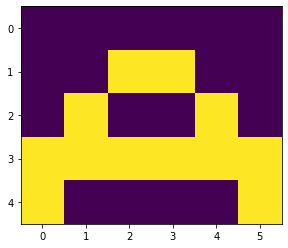

In [60]:
# visualizing the data, ploting A. 
plt.imshow(np.array(a1).reshape(5, 6)) 
plt.show() 

In [68]:
x =[np.array(a).reshape(1, 30), np.array(a1).reshape(1, 30), np.array(b).reshape(1, 30),  
                                np.array(c).reshape(1, 30)] 
  
  

In [69]:
y = np.array(y)

In [70]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [71]:
def sigmoid(x): 
    return(1/(1 + np.exp(-x))) 

In [72]:
# Creating the Feed forward neural network 
# 1 Input layer(1, 30) 
# 1 hidden layer (1, 5) 
# 1 output layer(3, 3) 
  
def f_forward(x, w1, w2): 
    # hidden 
    z1 = x.dot(w1)# input from layer 1  
    a1 = sigmoid(z1)# out put of layer 2  
    # Output layer 
    z2 = a1.dot(w2)# input of out layer 
    a2 = sigmoid(z2)# output of out layer 
    return(a2) 
   
# initializing the weights randomly 
def generate_wt(x, y): 
    l =[] 
    for i in range(x * y):
#         l.append(1)
        l.append(np.random.randn()) 
    return(np.array(l).reshape(x, y)) 
      
# for loss we will be using mean square error(MSE) 
def loss(out, Y): 
    s =(np.square(out-Y)) 
    s = np.sum(s)/len(y) 
    return(s) 
    
# Back propagation of error  
def back_prop(x, y, w1, w2, alpha): 
      
    # hiden layer 
    z1 = x.dot(w1)# input from layer 1  
    a1 = sigmoid(z1)# output of layer 2  
      
    # Output layer 
    z2 = a1.dot(w2)# input of out layer 
    a2 = sigmoid(z2)# output of out layer 
    # error in output layer 
    d2 =(a2-y) 
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),  
                                   (np.multiply(a1, 1-a1))) 
  
    # Gradient for w1 and w2 
    w1_adj = x.transpose().dot(d1) 
    w2_adj = a1.transpose().dot(d2) 
      
    # Updating parameters 
    w1 = w1-(alpha*(w1_adj)) 
    w2 = w2-(alpha*(w2_adj)) 
      
    return(w1, w2) 

In [73]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10): 
    acc =[] 
    losss =[] 
    for j in range(epoch): 
        l =[] 
        for i in range(len(x)): 
            out = f_forward(x[i], w1, w2) 
            l.append((loss(out, Y[i]))) 
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha) 
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100, "=== loss:", (sum(l)/len(x)))    
        acc.append((1-(sum(l)/len(x)))*100) 
        losss.append(sum(l)/len(x)) 
    return(acc, losss, w1, w2) 
   
def predict(x, w1, w2): 
    Out = f_forward(x, w1, w2) 
    maxm = 0
    k = 0
    for i in range(len(Out[0])): 
        if(maxm<Out[0][i]): 
            maxm = Out[0][i] 
            k = i 
    if(k == 0): 
        print("Image is of letter A.") 
    elif(k == 1): 
        print("Image is of letter B.") 
    else: 
        print("Image is of letter C.") 
    plt.imshow(x.reshape(5, 6)) 
    plt.show()    

In [74]:
w1 = generate_wt(30, 5) 
w2 = generate_wt(5, 3) 
print(w1, "\n\n", w2)

[[ 0.38219916 -0.45604937  2.25461897  0.89125017  1.55059196]
 [ 0.5358067  -2.07057919 -0.04227829  0.26983835  2.54898485]
 [ 0.28784681  0.24656276  0.96973326 -0.2927887   0.21120593]
 [-1.12795655 -1.01275428  1.32767706  0.28206045  1.180561  ]
 [ 1.10411894  0.81541289 -1.50732034 -0.12191972 -1.63695408]
 [-0.19908753  0.87436324  0.69107165 -0.67363957  0.17870426]
 [ 0.88620829  0.08651471  0.49240785 -1.02649327  0.14871372]
 [ 1.2293042   0.04707348  0.14872977 -1.27286333 -0.75777771]
 [-2.63436418 -0.73811208 -0.60907304 -1.35199759  0.86778045]
 [ 0.07432669  0.28700289 -0.12567387 -0.04505455  2.80761736]
 [ 0.7354888   1.43469535 -0.09323984 -0.92996002  0.21779189]
 [-1.0692555  -0.06797312  2.04781793 -1.09910432 -0.37397659]
 [ 0.01442575 -0.1640519  -0.42959155  0.22981779 -1.42591569]
 [ 0.69826708  0.56450803  1.34319737 -1.25484768  1.34290813]
 [ 0.95985716 -1.51483908 -1.41375289 -0.5681959  -1.76850046]
 [ 1.29467564  0.06269196  1.56411005 -0.6972834   0.17

In [75]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 80.22170630930124 === loss: 0.19778293690698753
epochs: 2 ======== acc: 81.64381797545676 === loss: 0.18356182024543244
epochs: 3 ======== acc: 82.84846211457936 === loss: 0.17151537885420634
epochs: 4 ======== acc: 83.90276661753826 === loss: 0.16097233382461745
epochs: 5 ======== acc: 84.84557599712834 === loss: 0.1515442400287167
epochs: 6 ======== acc: 85.69678037643422 === loss: 0.14303219623565783
epochs: 7 ======== acc: 86.46615124757562 === loss: 0.13533848752424368
epochs: 8 ======== acc: 87.15999615374625 === loss: 0.12840003846253756
epochs: 9 ======== acc: 87.78448376301515 === loss: 0.12215516236984855
epochs: 10 ======== acc: 88.34648147239457 === loss: 0.11653518527605419
epochs: 11 ======== acc: 88.85328762649249 === loss: 0.11146712373507502
epochs: 12 ======== acc: 89.31212226150632 === loss: 0.10687877738493687
epochs: 13 ======== acc: 89.72971419436485 === loss: 0.10270285805635165
epochs: 14 ======== acc: 90.11205941072963 === loss: 0.098879

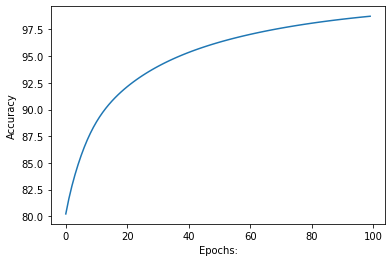

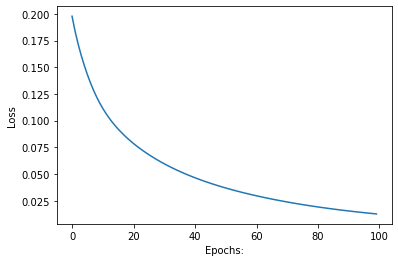

In [76]:
import matplotlib.pyplot as plt1 
  
# ploting accuraccy 
plt1.plot(acc) 
plt1.ylabel('Accuracy') 
plt1.xlabel("Epochs:") 
plt1.show() 
  
# plotting Loss 
plt1.plot(losss) 
plt1.ylabel('Loss') 
plt1.xlabel("Epochs:") 
plt1.show()

Image is of letter C.


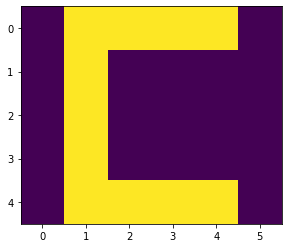

In [80]:
predict(x[3], w1, w2)